The general process has been followed for ARIMA models is the following:

1. Visualizing the Time Series Data
2. Making the time series data stationary
3. Plotting the Correlation and Autocorrelation charts
4. Constructing the ARIMA model or Seasonal ARIMA based on the data
5. Use the model to make predictions

## Autoregressive Integrated Moving Average

In [196]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [197]:
df=pd.read_csv("C:/Users/Promi/OneDrive/Desktop/timeseries.csv")

In [198]:
df.head()

,Month,Perrin Freres monthly champagne sales millions
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [199]:
## Cleaning up th data
df.columns=['Month', 'Sales']
## Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [200]:
# Convert Month into datetime
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# 

# Step 2: Visualize the data

<AxesSubplot:xlabel='Month'>

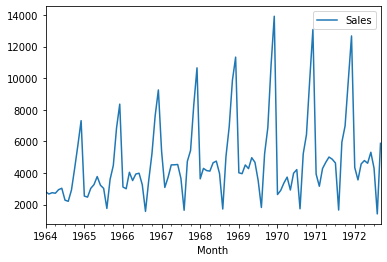

In [201]:
df.plot()

In [202]:
### Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [203]:
test_result= adfuller(df['Sales'])

In [204]:
#H0: It is nonstationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic', 'P-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<= 0.05:
        print("Strong evidence against the null hypothesis(H0), reject the null hypothesis")
    else:
        print("Weak evidense against null hypothesis, time series has a unit root, indicates it is nonstationary")
        


In [205]:
adfuller_test(df['Sales']) 

ADF Test Statistic:-1.8335930563276175
P-value:0.3639157716602477
#Lags Used:11
Number of Observations Used:93
Weak evidense against null hypothesis, time series has a unit root, indicates it is nonstationary


# Differencing

In [206]:
df['Sales First Difference']= df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']= df['Sales'] - df['Sales'].shift(12)
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [207]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-7.626619157213164
P-value:2.060579696813685e-11
#Lags Used:0
Number of Observations Used:92
Strong evidence against the null hypothesis(H0), reject the null hypothesis


<AxesSubplot:xlabel='Month'>

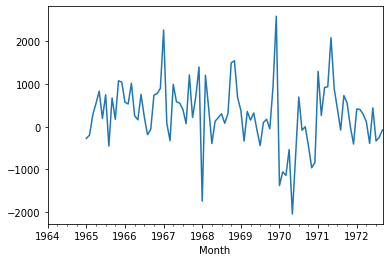

In [208]:
df['Seasonal First Difference'].plot()

# Autoregressive Model

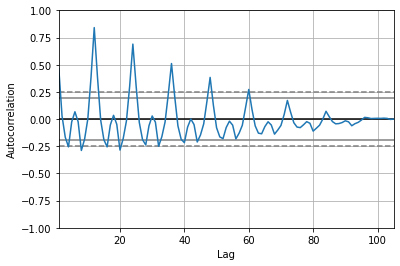

In [209]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

##### Identification of an AR model is often best done with the PACF
For an AR model, the theoritical PACF "shuts off" past the order of the model. The phrase "shuts off" means that in theory the partial autocorrelations are equal to zero beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the "order of the model" we mean the most extreme lag of X that is used as a predictor.

##### Identification of a MA model is often best done with the ACF rather than PACF
For an MA model, the theoritical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the models

c:\Users\Promi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


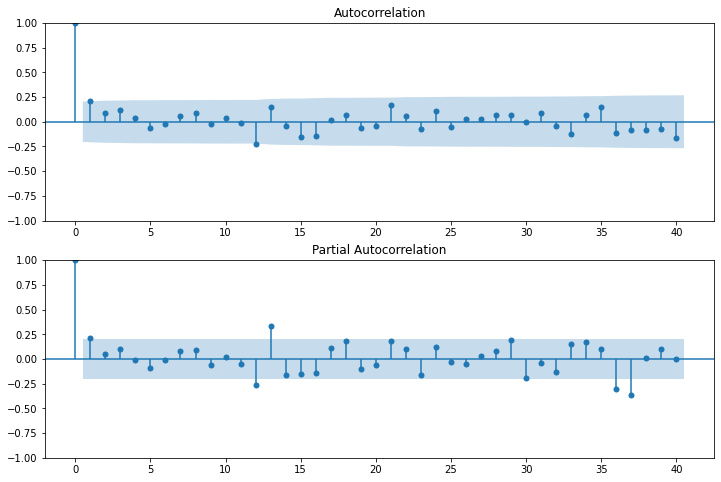

In [210]:
import statsmodels.api as sm  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)


In [211]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(df['Sales'], order=(1, 1, 1))
model_fit=model.fit()
model_fit.summary()

c:\Users\Promi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Promi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Promi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 23 Jan 2023   AIC                           1911.627
Time:                        08:38:07   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [212]:
df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)

<AxesSubplot:xlabel='Month'>

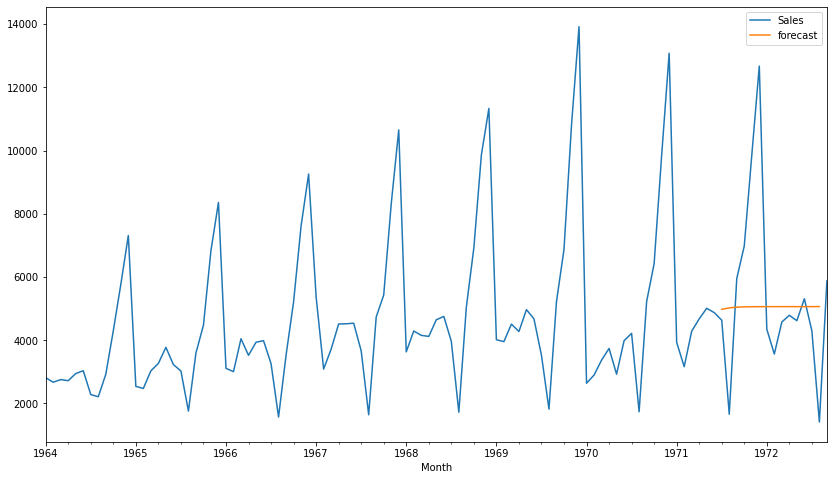

In [213]:
df[['Sales', 'forecast']].plot(figsize=(14,8))

In [214]:
import statsmodels.api as sm
model= sm.tsa.statespace.SARIMAX (df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results=model.fit()

c:\Users\Promi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Promi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

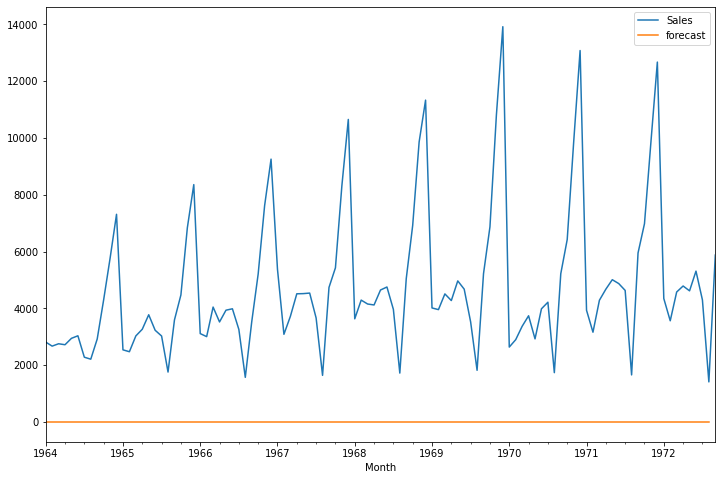

In [215]:
df['forecast']=results.predict(starts=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [216]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0, 24)]

In [217]:
future_datest_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [218]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [219]:
future_df=pd.concat([df, future_datest_df])

<AxesSubplot:>

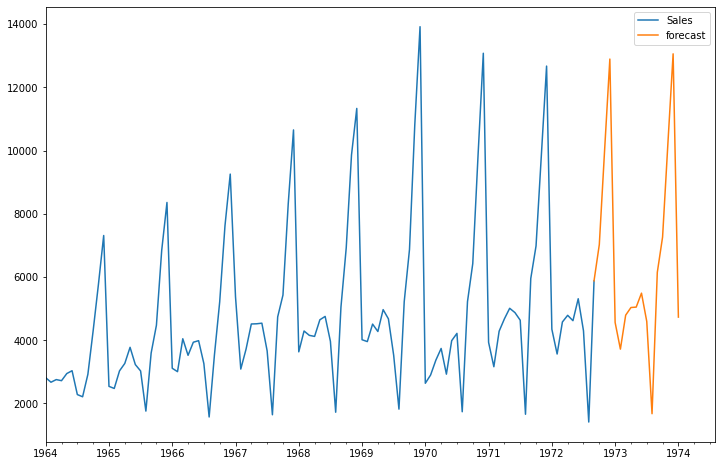

In [222]:
future_df['forecast']=results.predict(start=104, end=120, dynamic=True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))